# EDA and Experiments on Mens Data Only

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Loading the datasets

In [2]:
m_teams = pd.read_csv('MTeams.csv')
m_compact_results = pd.read_csv('MRegularSeasonCompactResults.csv')
m_detailed_results = pd.read_csv('MRegularSeasonDetailedResults.csv')


In [3]:
m_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


In [4]:
m_compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [5]:
m_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


## Focusing on the Men's Results, trying to understand the specific team vs team breakdown of stats

In [9]:
m_detailed_results.WTeamID.value_counts()
allTeams = set(m_detailed_results.WTeamID.to_list() + m_detailed_results.LTeamID.to_list())
len(allTeams)

371

In [10]:
# Creating a win/loss dictionary to understand the balance of the target variable per team
teamDict = {}
for i in allTeams:
    teamDict[i] = {'wins' : 0, 'losses' : 0}

for j in m_detailed_results.WTeamID.to_list():
    teamDict[j]['wins'] += 1
for k in m_detailed_results.LTeamID.to_list():
    teamDict[k]['losses'] += 1


In [11]:
teamDict.items()

dict_items([(1101, {'wins': 148, 'losses': 167}), (1102, {'wins': 285, 'losses': 379}), (1103, {'wins': 463, 'losses': 242}), (1104, {'wins': 439, 'losses': 277}), (1105, {'wins': 198, 'losses': 425}), (1106, {'wins': 268, 'losses': 393}), (1107, {'wins': 344, 'losses': 347}), (1108, {'wins': 209, 'losses': 449}), (1110, {'wins': 341, 'losses': 339}), (1111, {'wins': 311, 'losses': 349}), (1112, {'wins': 539, 'losses': 193}), (1113, {'wins': 375, 'losses': 331}), (1114, {'wins': 323, 'losses': 342}), (1115, {'wins': 198, 'losses': 476}), (1116, {'wins': 433, 'losses': 290}), (1117, {'wins': 303, 'losses': 357}), (1119, {'wins': 254, 'losses': 395}), (1120, {'wins': 400, 'losses': 308}), (1122, {'wins': 329, 'losses': 350}), (1123, {'wins': 298, 'losses': 370}), (1124, {'wins': 429, 'losses': 254}), (1125, {'wins': 497, 'losses': 205}), (1126, {'wins': 252, 'losses': 400}), (1127, {'wins': 230, 'losses': 426}), (1128, {'wins': 67, 'losses': 39}), (1129, {'wins': 414, 'losses': 274}), (1

## Create Dictonary of each teams results for all years

In [12]:
teamDetailedDict = {}
for i in allTeams:
    condition1 = m_detailed_results.WTeamID == i
    condition2 = m_detailed_results.LTeamID == i

    teamDetailedDict[i] = m_detailed_results[condition1 | condition2]

In [13]:
teamDetailedDict.keys()

dict_keys([1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1119, 1120, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,

### Identify team with the most games

In [51]:
longest = 0
longIdx = ''
for i in teamDetailedDict:
    if len(teamDetailedDict[i]) > longest:
        longest = len(teamDetailedDict[i])
        longIdx = i
print(f"Longest: {longIdx}, Length: {longest}")


Longest: 1314, Length: 740


In [ ]:
#Create Win and Loss Categories in every DataFrame
for key in teamDetailedDict.keys():
    win = []
    for i in teamDetailedDict[key].WTeamID:
        if i == key:
            win.append(1)
        else:
            win.append(0)
    teamDetailedDict[key]['win'] = win

In [58]:
#Create Home, away, neutral Categories in every DataFrame
for key in teamDetailedDict.keys():
    wloc_num = []
    for i in teamDetailedDict[key].WLoc:
        if i =='H':
            wloc_num.append(1)
        elif i == 'A':
            wloc_num.append(0)
        else:
            wloc_num.append(2)
    teamDetailedDict[key]['wloc_num'] = wloc_num



In [67]:
#Create Home, away, neutral Categories in every DataFrame for the LOSER
for key in teamDetailedDict.keys():
    lloc_num = []
    for i in teamDetailedDict[key].WLoc:
        if i =='H':
            lloc_num.append(0)
        elif i == 'A':
            lloc_num.append(1)
        else:
            lloc_num.append(2)
    teamDetailedDict[key]['lloc_num'] = lloc_num

In [69]:
teamDetailedDict[1314][['wloc_num','lloc_num']]

,wloc_num,lloc_num
19,1,0
30,1,0
187,0,1
318,2,2
352,2,2
...,...,...
116710,1,0
116879,1,0
117283,1,0
117355,1,0


## Transpose from Winning Team and Losing team to Team A being the same as Key, and Team B is opposing. Perspective is Team A for win and location

In [70]:
teamDetailedDict[1314].columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'win', 'wloc_num', 'lloc_num'],
      dtype='object')

In [81]:
for df in teamDetailedDict.keys():
    teamDetailedDict[df].reset_index(drop=True, inplace=True)

In [15]:
from tqdm import tqdm

## Create a New DataFrame for all teams, all games, opposing all others, and the target of win = 1 or loss = 0

In [85]:
trans_cols = ['season','day_num','team_id','o_team_id','loc_num','num_ot','fgm','fga','fgm3','fga3','ftm','fta','oreb','dreb','assist','to','steal','blocks','fouls',
              'o_fgm','o_fga','o_fgm3','o_fga3','o_ftm','o_fta','o_oreb','o_dreb','o_assist','o_to','o_steal','o_blocks','o_fouls','win']
transformTeamsDF = pd.DataFrame(columns=trans_cols)




In [88]:
for team in tqdm(teamDetailedDict.keys()):
    for row in range(0, len(teamDetailedDict[team])):
        if teamDetailedDict[team].loc[row]['WTeamID'] == team:
            newRow = pd.DataFrame([{'season': teamDetailedDict[team].loc[row]['Season'],
                      'day_num' : teamDetailedDict[team].loc[row]['DayNum'],
                      'team_id' : teamDetailedDict[team].loc[row]['WTeamID'],
                      'o_team_id' : teamDetailedDict[team].loc[row]['LTeamID'],
                      'loc_num' : teamDetailedDict[team].loc[row]['wloc_num'],
                      'num_ot' : teamDetailedDict[team].loc[row]['NumOT'],
                      'fgm' : teamDetailedDict[team].loc[row]['WFGM'],
                      'fga' : teamDetailedDict[team].loc[row]['WFGA'],
                      'fgm3' : teamDetailedDict[team].loc[row]['WFGM3'],
                      'fga3' : teamDetailedDict[team].loc[row]['WFGA3'],
                      'ftm' : teamDetailedDict[team].loc[row]['WFTM'],
                      'fta' : teamDetailedDict[team].loc[row]['WFTA'],
                      'oreb' : teamDetailedDict[team].loc[row]['WOR'],
                      'dreb' : teamDetailedDict[team].loc[row]['WDR'],
                      'assist' : teamDetailedDict[team].loc[row]['WAst'],
                      'to': teamDetailedDict[team].loc[row]['WTO'],
                      'steal' : teamDetailedDict[team].loc[row]['WStl'],
                      'blocks' : teamDetailedDict[team].loc[row]['WBlk'],
                      'fouls' : teamDetailedDict[team].loc[row]['WPF'],
                      'o_fgm' : teamDetailedDict[team].loc[row]['LFGM'],
                      'o_fga' : teamDetailedDict[team].loc[row]['LFGA'],
                      'o_fgm3' : teamDetailedDict[team].loc[row]['LFGM3'],
                      'o_fga3' : teamDetailedDict[team].loc[row]['LFGA3'],
                      'o_ftm' : teamDetailedDict[team].loc[row]['LFTM'],
                      'o_fta' : teamDetailedDict[team].loc[row]['LFTA'],
                      'o_oreb' : teamDetailedDict[team].loc[row]['LOR'],
                      'o_dreb' : teamDetailedDict[team].loc[row]['LDR'],
                      'o_assist' : teamDetailedDict[team].loc[row]['LAst'],
                      'o_to': teamDetailedDict[team].loc[row]['LTO'],
                      'o_steal' : teamDetailedDict[team].loc[row]['LStl'],
                      'o_blocks' : teamDetailedDict[team].loc[row]['LBlk'],
                      'o_fouls' : teamDetailedDict[team].loc[row]['LPF'],
                      'win' : teamDetailedDict[team].loc[row]['win']
            }])
            transformTeamsDF = pd.concat([transformTeamsDF, newRow], ignore_index=True)
        elif teamDetailedDict[team].loc[row]['LTeamID'] == team:
            newRow = pd.DataFrame([{'season': teamDetailedDict[team].loc[row]['Season'],
                      'day_num' : teamDetailedDict[team].loc[row]['DayNum'],
                      'team_id' : teamDetailedDict[team].loc[row]['LTeamID'],
                      'o_team_id' : teamDetailedDict[team].loc[row]['WTeamID'],
                      'loc_num' : teamDetailedDict[team].loc[row]['lloc_num'],
                      'num_ot' : teamDetailedDict[team].loc[row]['NumOT'],
                      'fgm' : teamDetailedDict[team].loc[row]['LFGM'],
                      'fga' : teamDetailedDict[team].loc[row]['LFGA'],
                      'fgm3' : teamDetailedDict[team].loc[row]['LFGM3'],
                      'fga3' : teamDetailedDict[team].loc[row]['LFGA3'],
                      'ftm' : teamDetailedDict[team].loc[row]['LFTM'],
                      'fta' : teamDetailedDict[team].loc[row]['LFTA'],
                      'oreb' : teamDetailedDict[team].loc[row]['LOR'],
                      'dreb' : teamDetailedDict[team].loc[row]['LDR'],
                      'assist' : teamDetailedDict[team].loc[row]['LAst'],
                      'to': teamDetailedDict[team].loc[row]['LTO'],
                      'steal' : teamDetailedDict[team].loc[row]['LStl'],
                      'blocks' : teamDetailedDict[team].loc[row]['LBlk'],
                      'fouls' : teamDetailedDict[team].loc[row]['LPF'],
                      'o_fgm' : teamDetailedDict[team].loc[row]['WFGM'],
                      'o_fga' : teamDetailedDict[team].loc[row]['WFGA'],
                      'o_fgm3' : teamDetailedDict[team].loc[row]['WFGM3'],
                      'o_fga3' : teamDetailedDict[team].loc[row]['WFGA3'],
                      'o_ftm' : teamDetailedDict[team].loc[row]['WFTM'],
                      'o_fta' : teamDetailedDict[team].loc[row]['WFTA'],
                      'o_oreb' : teamDetailedDict[team].loc[row]['WOR'],
                      'o_dreb' : teamDetailedDict[team].loc[row]['WDR'],
                      'o_assist' : teamDetailedDict[team].loc[row]['WAst'],
                      'o_to': teamDetailedDict[team].loc[row]['WTO'],
                      'o_steal' : teamDetailedDict[team].loc[row]['WStl'],
                      'o_blocks' : teamDetailedDict[team].loc[row]['WBlk'],
                      'o_fouls' : teamDetailedDict[team].loc[row]['WPF'],
                      'win' : teamDetailedDict[team].loc[row]['win']
            }])
            transformTeamsDF = pd.concat([transformTeamsDF, newRow], ignore_index=True)
print(len(transformTeamsDF))
print(transformTeamsDF.head())

100%|██████████| 371/371 [1:17:38<00:00, 12.56s/it]

235496
  season day_num team_id o_team_id loc_num num_ot fgm fga fgm3 fga3  ...  \
0   2014       5    1101      1182       0      0  22  63    7   25  ...   
1   2014       7    1101      1382       0      0  14  40    4   16  ...   
2   2014       9    1101      1268       0      0  17  54   10   21  ...   
3   2014      13    1101      1234       0      0  14  54    3   23  ...   
4   2014      15    1101      1395       0      0  19  50    9   20  ...   

  o_ftm o_fta o_oreb o_dreb o_assist o_to o_steal o_blocks o_fouls win  
0    27    37     10     32       19   10       4        2      22   0  
1    23    32     18     22       15    9       7        7      23   0  
2    11    17     14     27       12   17       9       10       8   0  
3    18    22      5     31       25    5      11        5      10   0  
4    24    37      8     25       11    6       7        3      20   0  

[5 rows x 33 columns]


In [116]:
transformTeamsDF = transformTeamsDF.astype(int)

## Write the DF to CSV so that it does not need to be rebuilt for future use because that took over and hour

In [118]:
transformTeamsDF.to_csv('transformedTeamsDF.csv', index=False)

In [119]:
duplicated_rows = transformTeamsDF.drop('win', axis=1).duplicated(keep=False)
duplicated_rows.value_counts()
                                                                   

False    235496
Name: count, dtype: int64

In [120]:
transformTeamsDF.head()

,season,day_num,team_id,o_team_id,loc_num,num_ot,fgm,fga,fgm3,fga3,...,o_ftm,o_fta,o_oreb,o_dreb,o_assist,o_to,o_steal,o_blocks,o_fouls,win
0,2014,5,1101,1182,0,0,22,63,7,25,...,27,37,10,32,19,10,4,2,22,0
1,2014,7,1101,1382,0,0,14,40,4,16,...,23,32,18,22,15,9,7,7,23,0
2,2014,9,1101,1268,0,0,17,54,10,21,...,11,17,14,27,12,17,9,10,8,0
3,2014,13,1101,1234,0,0,14,54,3,23,...,18,22,5,31,25,5,11,5,10,0
4,2014,15,1101,1395,0,0,19,50,9,20,...,24,37,8,25,11,6,7,3,20,0


## OK New Data Set - Trying to classify the win!

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [136]:
def ClassificationMetrics(y_test=y_test, y_pred=y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    ConfusionMatrixDisplay(conf_matrix).plot()

In [180]:
features = transformTeamsDF.columns.to_list()[4:-1]
X = transformTeamsDF[features]
y = transformTeamsDF['win']

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235496 entries, 0 to 235495
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   loc_num   235496 non-null  int32
 1   num_ot    235496 non-null  int32
 2   fgm       235496 non-null  int32
 3   fga       235496 non-null  int32
 4   fgm3      235496 non-null  int32
 5   fga3      235496 non-null  int32
 6   ftm       235496 non-null  int32
 7   fta       235496 non-null  int32
 8   oreb      235496 non-null  int32
 9   dreb      235496 non-null  int32
 10  assist    235496 non-null  int32
 11  to        235496 non-null  int32
 12  steal     235496 non-null  int32
 13  blocks    235496 non-null  int32
 14  fouls     235496 non-null  int32
 15  o_fgm     235496 non-null  int32
 16  o_fga     235496 non-null  int32
 17  o_fgm3    235496 non-null  int32
 18  o_fga3    235496 non-null  int32
 19  o_ftm     235496 non-null  int32
 20  o_fta     235496 non-null  int32
 21  o_oreb    

In [182]:
y.sum()

117748

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [184]:
y_train

17805     0
87267     1
119080    1
176497    1
72999     1
         ..
119879    1
103694    1
131932    1
146867    0
121958    0
Name: win, Length: 164847, dtype: int32

In [185]:
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)


Accuracy: 0.9420373961414882
Precision: 0.9420390421834256
Recall: 0.9420373961414882
F1 Score: 0.9420371574954618


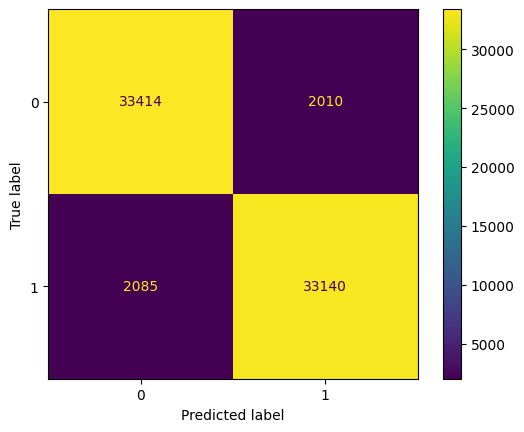

In [186]:
ClassificationMetrics(y_test, y_pred)

<Axes: >

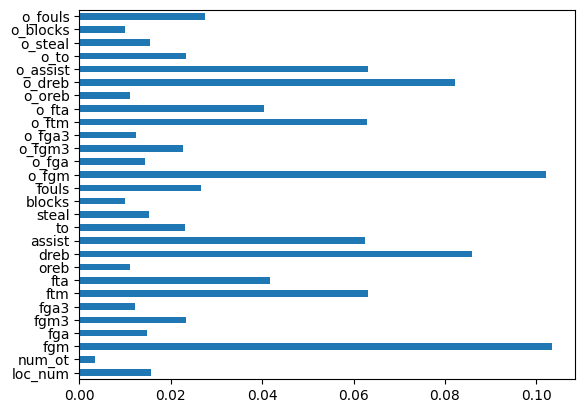

In [187]:
Feature_importances = pd.Series(clf.feature_importances_, index=features)
Feature_importances.plot.barh()

In [188]:
valsToRemove = ['fgm','ofgm']
feats = [item for item in features if item not in valsToRemove]


In [189]:
# Re-run with less features - b/c FGM is an obvious one to predict with
X = transformTeamsDF[feats]
y = transformTeamsDF['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)





Accuracy: 0.90700505315008
Precision: 0.907005025353853
Recall: 0.90700505315008
F1 Score: 0.9070049803748397


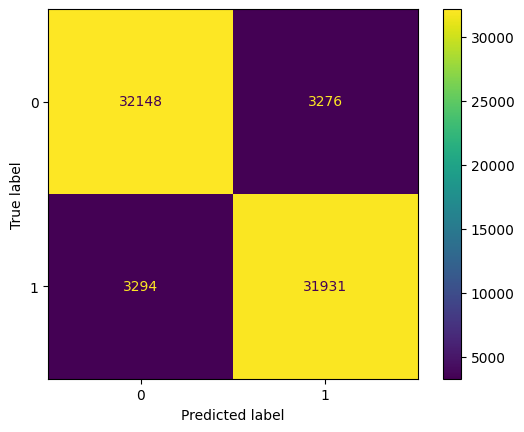

In [190]:
ClassificationMetrics(y_test, y_pred)

<Axes: >

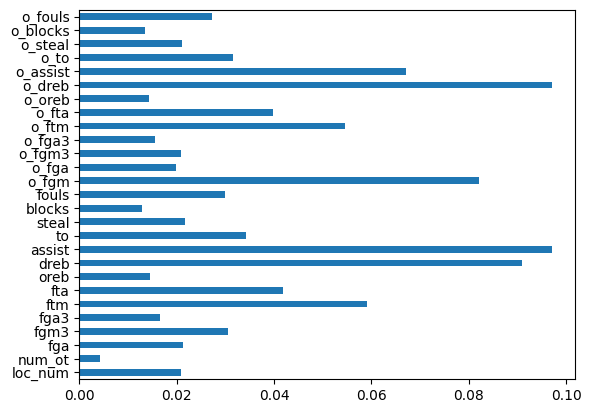

In [191]:
Feature_importances = pd.Series(clf.feature_importances_, index=feats)
Feature_importances.plot.barh()

In [192]:
defenseFeats = ['o_dreb','o_blocks','o_steal','o_fouls','dreb','blocks','steal','fouls','num_ot','loc_num']
X = transformTeamsDF[defenseFeats]
y = transformTeamsDF['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
clf = RandomForestClassifier(n_estimators=100, random_state=21)

clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

Accuracy: 0.8456595280895696
Precision: 0.8456927987572026
Recall: 0.8456595280895696
F1 Score: 0.8456556433172452


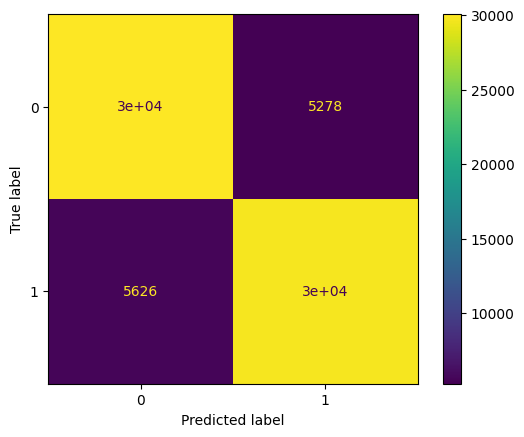

In [193]:
ClassificationMetrics(y_test, y_pred)

<Axes: >

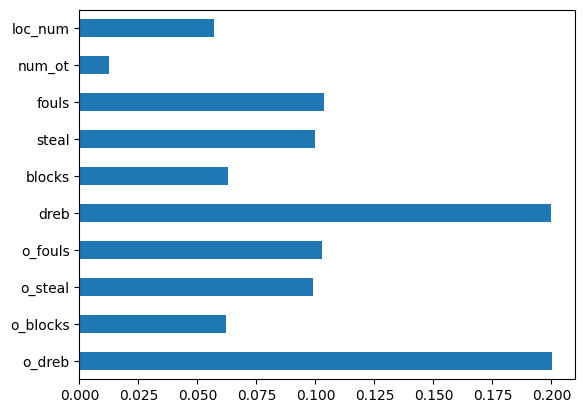

In [195]:
Feature_importances = pd.Series(clf.feature_importances_, index=defenseFeats)
Feature_importances.plot.barh()

## These results look like the models are biased and memorizing the data set.  Need to clearly determine if there are duplicated rows - for example when team and o_team are sawpped because the same game is recorded for both teams - only one record is needed (one is win, one is loss)

In [197]:
teamDF = transformTeamsDF[['season','day_num','team_id','o_team_id','loc_num','win']]

In [198]:
sorted_df = teamDF.sort_values(by=['season', 'day_num','team_id','o_team_id','loc_num'], ascending=[True, True, True, True, True])

In [199]:
sorted_df

,season,day_num,team_id,o_team_id,loc_num,win
1684,2003,10,1104,1328,2,1
108815,2003,10,1272,1393,2,1
143737,2003,10,1328,1104,2,0
186764,2003,10,1393,1272,2,0
52839,2003,11,1186,1458,0,0
...,...,...,...,...,...,...
232542,2025,106,1462,1139,1,1
234178,2025,106,1466,1480,1,1
234475,2025,106,1468,1122,1,1
235132,2025,106,1474,1146,1,1


## This confirms my suspicion that the analysis must be done on a team by team basis because every winner has a loser with the same stats in the opposite features, so will always be very easy to predict

In [200]:
# Rebuild team dictionary with re-factored dataset
teamDfDict = {}
for i in allTeams:
    teamDfDict[i] = transformTeamsDF[transformTeamsDF.team_id == i]

In [201]:
teamDfDict[1101].win.mean()

0.46984126984126984

In [208]:
# Re-run with less features - b/c FGM is an obvious one to predict with
X = teamDfDict[1101][feats]
y = teamDfDict[1101]['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

Accuracy: 0.8736842105263158
Precision: 0.8930250153686101
Recall: 0.8736842105263158
F1 Score: 0.8735442329227324


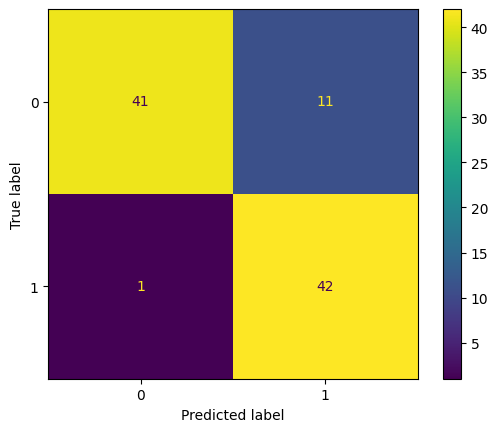

In [209]:
ClassificationMetrics(y_test, y_pred)

<Axes: >

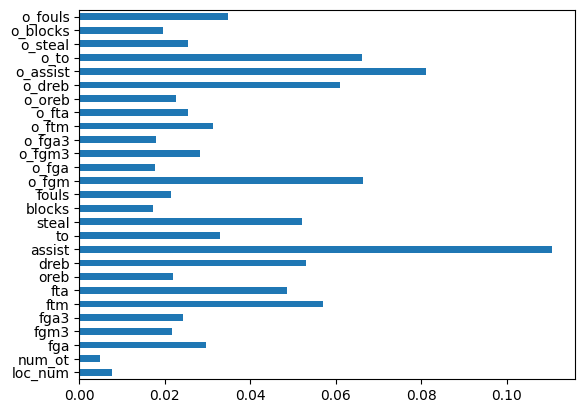

In [210]:
Feature_importances = pd.Series(clf.feature_importances_, index=feats)
Feature_importances.plot.barh()

In [212]:
Feature_importances.sort_values(ascending=False)

assist      0.110503
o_assist    0.081053
o_fgm       0.066405
o_to        0.066167
o_dreb      0.060899
ftm         0.056985
dreb        0.052960
steal       0.052149
fta         0.048584
o_fouls     0.034754
to          0.032906
o_ftm       0.031188
fga         0.029742
o_fgm3      0.028321
o_fta       0.025346
o_steal     0.025327
fga3        0.024274
o_oreb      0.022497
oreb        0.021900
fgm3        0.021682
fouls       0.021490
o_blocks    0.019632
o_fga3      0.017983
o_fga       0.017792
blocks      0.017137
loc_num     0.007576
num_ot      0.004750
dtype: float64

In [206]:
# Re-run with Defensive features - b/c FGM is an obvious one to predict with
X = teamDfDict[1101][defenseFeats]
y = teamDfDict[1101]['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)


Accuracy: 0.7368421052631579
Precision: 0.7393639377947975
Recall: 0.7368421052631579
F1 Score: 0.7373690651146723


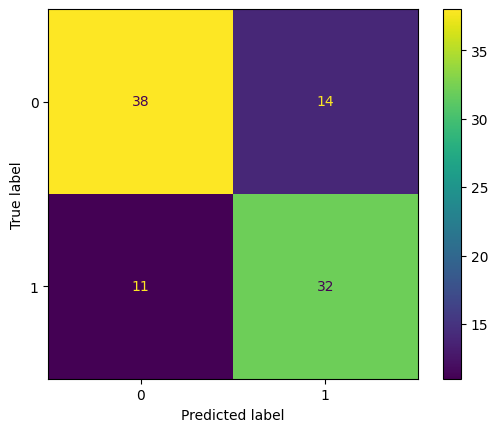

In [207]:
ClassificationMetrics(y_test, y_pred)

In [230]:
# Per year mean / median for all metrics per team for all games - then test the theory by replacing the mean/median metrics for the stats when trying to classify
len(teamDfDict[1101][teamDfDict[1101].season >= 2022])

108

### Loop Thru the Dictionary of dataframes
### Creating 3 datasets - Train/Test = 2022-2023-2024-2025
### For each dataframe, run the prediction and record the stats in a new dataframe for evaluation


In [256]:
def ClassMetrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [257]:
feats = [x for  x in  feats if x not in ['fgm3','ftm','assist','o_fgm','o_fgm3','o_ftm','o_assist']]


In [267]:
metricsDF = pd.DataFrame()
teams, accuracy, precision, recall, f1List = [], [], [], [], []
train_accuracy, train_precision, train_recall, train_f1 = [], [], [], []
failedTeams = []

for team in tqdm(teamDfDict.keys()):
    for iteration in range(100):
        preX = teamDfDict[team][teamDfDict[team].season >= 2022]
        if len(preX) ==0:
            failedTeams.append(team)
            continue
        X = preX[feats]
        y = preX['win']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=iteration)
        clf = RandomForestClassifier(n_estimators=25, random_state=iteration)

        clf.fit(X_train, y_train)
        # Make predictions
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)

        acc, prec, rec, f1sc = ClassMetrics(y_train, y_pred_train)
        teams.append(team)
        train_accuracy.append(acc)
        train_precision.append(prec)
        train_recall.append(rec)
        train_f1.append(f1sc)

        acc, prec, rec, f1sc = ClassMetrics(y_test, y_pred_test)
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1List.append(f1sc)

metricsDF['team'] = teams
metricsDF['accuracy'] = accuracy
metricsDF['train_accuracy'] = train_accuracy
metricsDF['precision'] = precision
metricsDF['train_precision'] = train_precision
metricsDF['recall'] = recall
metricsDF['train_recall'] = train_recall
metricsDF['f1'] = f1List
metricsDF['train_f1'] = train_f1

metricsDF


100%|██████████| 371/371 [21:58<00:00,  3.55s/it]


,team,accuracy,train_accuracy,precision,train_precision,recall,train_recall,f1,train_f1
0,1101,0.787879,1.0,0.831885,1.0,0.787879,1.0,0.791833,1.0
1,1101,0.696970,1.0,0.696970,1.0,0.696970,1.0,0.696970,1.0
2,1101,0.787879,1.0,0.791752,1.0,0.787879,1.0,0.789087,1.0
3,1101,0.575758,1.0,0.589884,1.0,0.575758,1.0,0.574198,1.0
4,1101,0.757576,1.0,0.757576,1.0,0.757576,1.0,0.757576,1.0
...,...,...,...,...,...,...,...,...,...
36595,1480,0.666667,1.0,0.444444,1.0,0.666667,1.0,0.533333,1.0
36596,1480,0.888889,1.0,0.790123,1.0,0.888889,1.0,0.836601,1.0
36597,1480,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
36598,1480,0.888889,1.0,0.790123,1.0,0.888889,1.0,0.836601,1.0


In [270]:
print(metricsDF.accuracy.median(), metricsDF.accuracy.mean(), metricsDF.f1.median(), metricsDF.f1.mean())
print(metricsDF[metricsDF.team==1480].accuracy)

0.7428571428571429 0.739497364986752 0.7293900298778346 0.7249401007657005
36500    0.777778
36501    0.777778
36502    0.888889
36503    0.666667
36504    0.888889
           ...   
36595    0.666667
36596    0.888889
36597    1.000000
36598    0.888889
36599    0.777778
Name: accuracy, Length: 100, dtype: float64


In [294]:
print(teamDfDict[1101].columns)


Index(['season', 'day_num', 'team_id', 'o_team_id', 'loc_num', 'num_ot', 'fgm',
       'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'oreb', 'dreb', 'assist', 'to',
       'steal', 'blocks', 'fouls', 'o_fgm', 'o_fga', 'o_fgm3', 'o_fga3',
       'o_ftm', 'o_fta', 'o_oreb', 'o_dreb', 'o_assist', 'o_to', 'o_steal',
       'o_blocks', 'o_fouls', 'win'],
      dtype='object')


In [297]:
win_feats = feats.append('win')
corr = teamDfDict[1102].corr().win
#sns.heatmap(corr)
print(corr.sort_values(ascending=False))

win          1.000000
assist       0.434271
fgm          0.336427
dreb         0.304960
o_to         0.288062
ftm          0.286343
fgm3         0.267767
steal        0.241709
fta          0.235812
loc_num      0.229456
o_fouls      0.224876
blocks       0.163219
oreb         0.062899
o_oreb       0.046961
o_team_id    0.010102
o_fga       -0.018225
fga3        -0.024388
num_ot      -0.029484
o_fga3      -0.056956
fga         -0.085006
o_steal     -0.163229
to          -0.168813
o_blocks    -0.171802
season      -0.222210
day_num     -0.230515
o_fgm3      -0.249404
fouls       -0.322696
o_fta       -0.362136
o_dreb      -0.392300
o_assist    -0.392573
o_ftm       -0.403873
o_fgm       -0.432016
team_id           NaN
Name: win, dtype: float64


## Different idea - what about sum everything then calculate the percentage difference between the team and opposing team in aggregate.  store as the teams profile
## then try to see if it work by running them against each other in each season?

In [301]:
testDF = teamDfDict[1102].copy(deep=True)
col_sums = testDF.sum()

In [302]:
col_sums

season       1337348
day_num        46744
team_id       731728
o_team_id     868186
loc_num          460
num_ot            26
fgm            14687
fga            32734
fgm3            5053
fga3           14193
ftm             7909
fta            11377
oreb            4532
dreb           13929
assist          9103
to              7984
steal           4082
blocks          1517
fouls          11541
o_fgm          15162
o_fga          33694
o_fgm3          4694
o_fga3         13470
o_ftm           8600
o_fta          12089
o_oreb          6055
o_dreb         15143
o_assist        8370
o_to            8511
o_steal         3853
o_blocks        2009
o_fouls        11847
win              285
dtype: int64